# Experimento 2: Dataset sintético sem correlação definida

Neste experimento, foi gerado um dataset sintético com 2 mil registros, sem garantir uma correlação forte entre a variável explicativa e o target.

## Resultados:
- Regressão Linear:  
  - MSE: 26026976.92  
  - RMSE: 5101.66  
  - MAE: 4008.58  
  - R²: 0.6656

> Conclusão: O desempenho é razoável, mas limitado pela ausência de correlação forte. Esse experimento mostra como a estrutura dos dados influencia diretamente a qualidade do modelo.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from scipy.stats import pearsonr
import scipy.stats as stats

# Gerando dataset sintético

In [2]:

# Definindo o número de amostras
np.random.seed(42)
n = 2000

# Variáveis explicativas
renda_mensal = np.random.normal(5000, 1500, n)
score_credito = np.random.normal(600, 50, n)
tempo_emprego = np.random.uniform(0, 20, n)
inadimplente_passado = np.random.binomial(1, 0.2, n)

# Criando relação linear com algum ruído
# Coeficientes fictícios
valor_aprovado = (
    renda_mensal * 2.5 +
    score_credito * 15 +
    tempo_emprego * 800 -
    inadimplente_passado * 10000 +
    np.random.normal(0, 5000, n)  # ruído
)

# Criando DataFrame
df = pd.DataFrame({
    'renda_mensal': renda_mensal,
    'score_credito': score_credito,
    'tempo_emprego': tempo_emprego,
    'inadimplente_passado': inadimplente_passado,
    'valor_aprovado': valor_aprovado
})




# Explorando dados

In [3]:
df.shape

(2000, 5)

In [4]:
df.head()

,renda_mensal,score_credito,tempo_emprego,inadimplente_passado,valor_aprovado
0,5745.071230,566.241086,9.700360,0,33564.778325
1,4792.603548,592.774066,1.708061,0,8980.428035
2,5971.532807,560.379004,19.449228,0,45725.846377
3,7284.544785,584.601924,10.360209,0,31579.874193
4,4648.769938,505.319267,12.283725,0,32461.532487


In [5]:
df.describe()

# Leitura: Dados bem diatribuídos ao longo da média, sem valores altos de dp (exceto para valor_aprovado). 
# Valores máximos não muito distantes da média. O que pode indicar ausencia de outliers max.
# Valores mínimos não muito distantes da médio. Exceto renda_mensal, analisado mais adiante.

,renda_mensal,score_credito,tempo_emprego,inadimplente_passado,valor_aprovado
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5067.626220,599.677875,9.906090,0.183000,27882.934798
std,1482.698487,50.267703,5.798175,0.386763,8736.599609
min,138.098990,449.024392,0.004820,0.000000,-4148.094231
25%,4066.007148,564.543702,4.869219,0.000000,22353.087077
50%,5067.037484,599.997335,9.709249,0.000000,28234.069009
75%,6024.466390,633.277184,15.097075,0.000000,33786.800912
max,10779.097236,796.311885,19.989214,1.000000,55646.448500


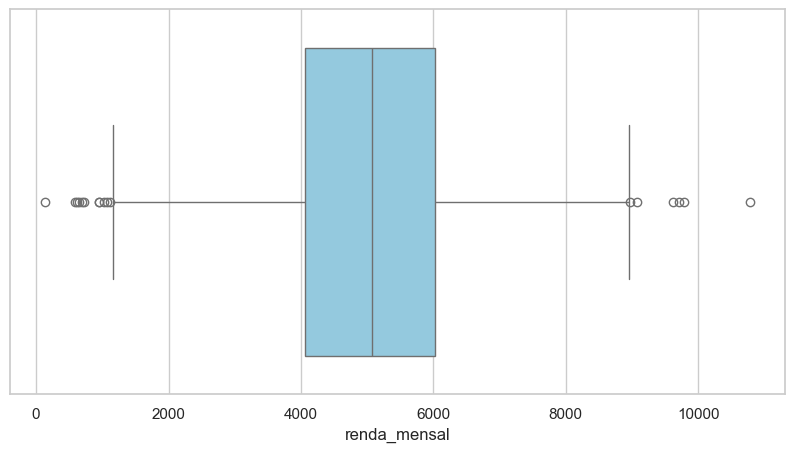

In [ ]:
# Gráfico para análise de outlier: renda_mensal min

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['renda_mensal'], color='skyblue')
plt.show()

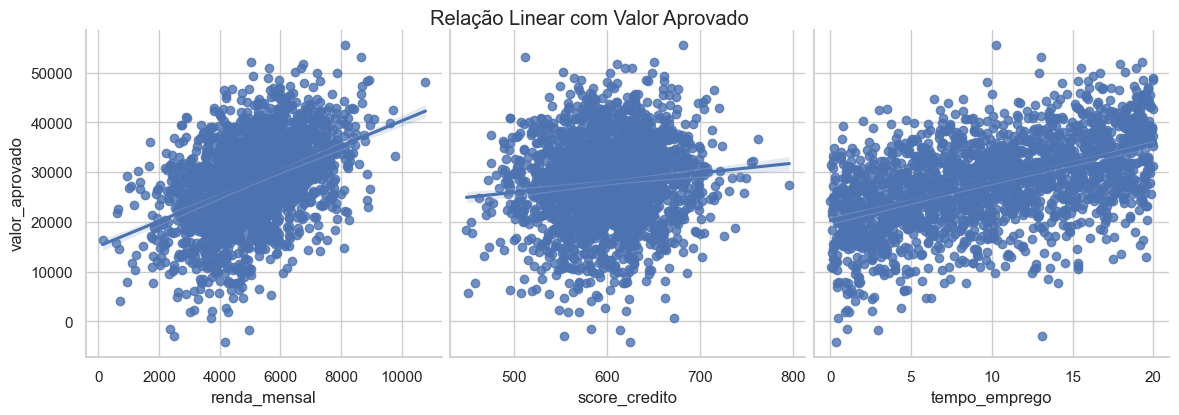

In [7]:
# Gráfico para analisar relação linear entre variável explicativa x variável independente.
#Conclusão: Há relação linear entre as variáveis. score_credito x valor_aprovado tem relação mais fraca

sns.pairplot(df, x_vars=['renda_mensal', 'score_credito', 'tempo_emprego'], y_vars='valor_aprovado', height=4, aspect=1, kind='reg')
plt.suptitle('Relação Linear com Valor Aprovado', y=1.02)
plt.show()


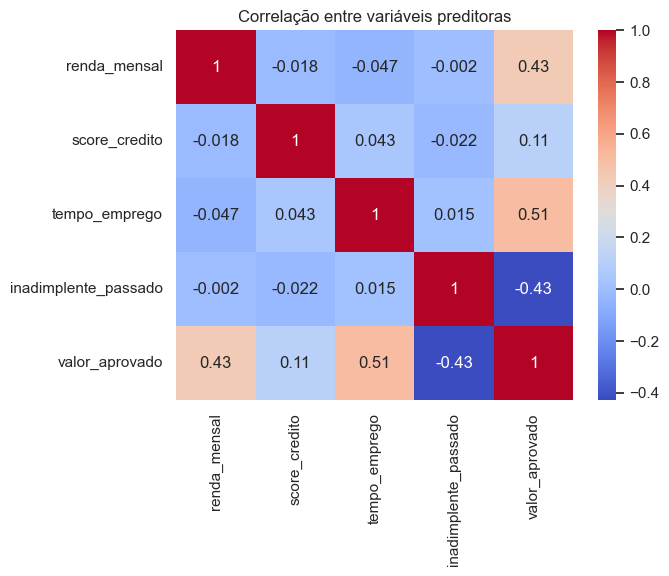

In [9]:
# Gráfico para analisar correlação entre variáveis

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre variáveis preditoras")
plt.show()

# Treinamento do modelo

In [10]:
# Divisão entre treino e teste

X = df[['renda_mensal', 'score_credito', 'tempo_emprego', 'inadimplente_passado']]
y = df['valor_aprovado']

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#escalonamento dos dados
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [12]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Previsões
y_pred = lr.predict(X_test_scaled)

In [13]:
# Original, com todas as variáveis
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 26026976.9161814
RMSE: 5101.66413204372
MAE: 4008.5811975729653
R²: 0.6655668957315825


# Análise de Residuos

A análise de resíduos é uma etapa fundamental na avaliação de modelos de regressão linear. Ela permite verificar se as **premissas do modelo** foram atendidas, como:

- **Linearidade**: os resíduos devem estar distribuídos aleatoriamente em torno de zero.
- **Homoscedasticidade**: a variância dos resíduos deve ser constante.
- **Normalidade dos erros**: os resíduos devem seguir uma distribuição normal.
- **Ausência de outliers ou padrões estruturados**.

Se essas condições não forem atendidas, a interpretação dos coeficientes pode ser incorreta e as previsões, pouco confiáveis. Por isso, a análise de resíduos é essencial para garantir a **validade estatística e a robustez do modelo**.

Text(0, 0.5, 'Frequência')

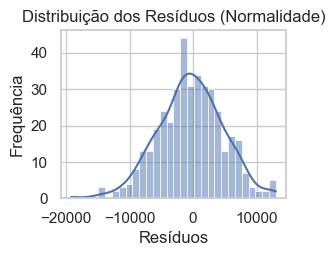

In [ ]:
# 1. Histograma dos resíduos
# Objetivo: verificar se os resíduos estão distribuídos aproximadamente como uma normal (simétrica).
# Esperado: Um formato de sino (curva normal), centrado em zero.

Pouca assimetria (skew) ou caudas longas.
plt.subplot(2, 2, 1)
sns.histplot(residuos, kde=True, bins=30)
plt.title("Distribuição dos Resíduos (Normalidade)")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")

Text(0.5, 1.0, 'Q-Q Plot dos Resíduos')

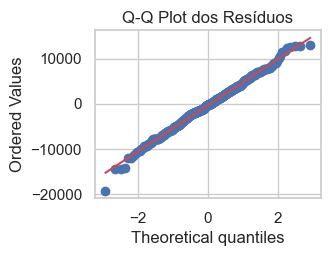

In [ ]:
# 2. Q-Q Plot (verificação visual de normalidade)
# Objetivo: comparar os quantis dos resíduos com os da distribuição normal.
# Esperado: Os pontos devem estar alinhados com a linha reta (linha 45°).

Pequenas curvaturas nos extremos são toleráveis, mas grandes desvios indicam não normalidade.
plt.subplot(2, 2, 2)
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot dos Resíduos")

Text(0, 0.5, 'Resíduos')

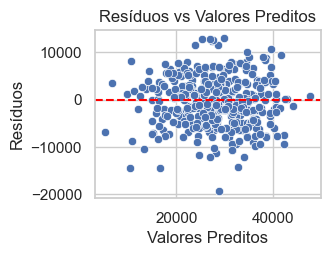

In [ ]:
# 3. Resíduos vs Valores Preditos (aleatoriedade e heterocedasticidade)
# Objetivo: verificar aleatoriedade e homocedasticidade (variância constante).
# Esperado: Um padrão de nuvem aleatória (sem forma específica).
# Os pontos devem estar distribuídos uniformemente ao redor da linha zero.
# Ruins: Formato em funil (mais dispersão nos extremos): heterocedasticidade.
#        Formato curvo: modelo não linear.


plt.subplot(2, 2, 3)
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs Valores Preditos")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")

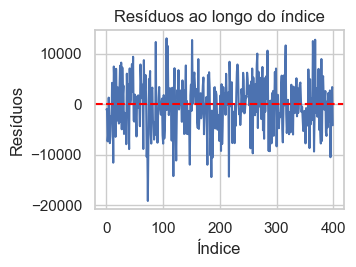

In [ ]:
# 4. Resíduos ao longo do índice (aleatoriedade temporal/sequencial)
# Objetivo: verificar se alguma variável X tem relação não modelada com o erro.
# Esperado: Mesmo padrão de nuvem aleatória, sem tendência clara.

plt.subplot(2, 2, 4)
plt.plot(residuos.values)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos ao longo do índice")
plt.xlabel("Índice")
plt.ylabel("Resíduos")

plt.tight_layout()
plt.show()
